In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [2]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
306,AutoMPG,turn,50,0.815914,0.815914
58,Hydrodynamics,random,58,-0.002835,-0.001089
427,Automobile,turn,30,0.641997,0.641997
547,Parkinsons,turn,828,0.380518,0.380518
569,ConcreteSlumpTest,random,29,0.131689,0.269020


In [3]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.944973,0.895982
46,Hydrodynamics,even,0.000619,0.988501
47,Hydrodynamics,random,-0.002573,0.940687
48,Hydrodynamics,skewed,-0.000754,0.983942
49,Hydrodynamics,turn,0.944973,0.944830


<Axes: xlabel='csv_file'>

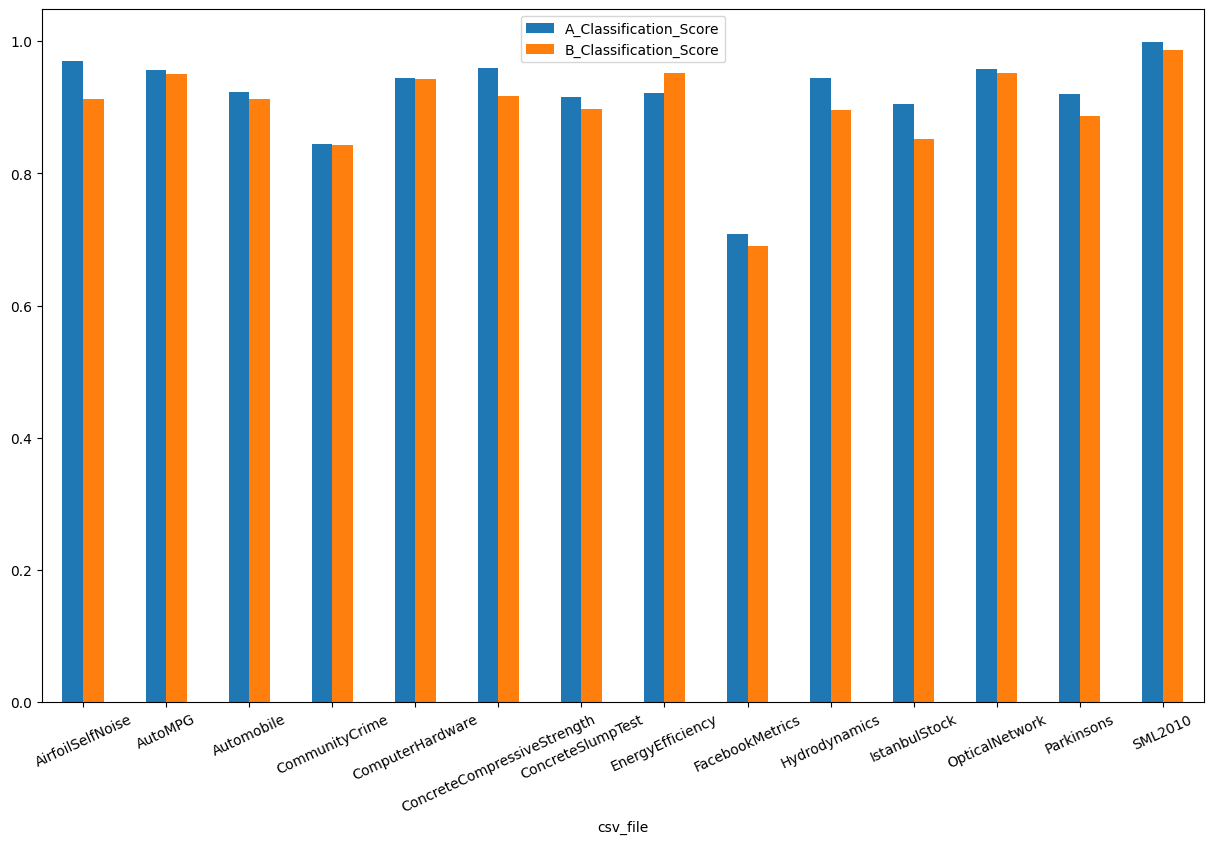

In [4]:
baselines_grouped[baselines_grouped["split"] == "distort"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [5]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)


File Length: 1228


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
290,RF-SPUD,CommunityCrime,turn,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...","{'42': -0.1701152321065711, '1738': -0.1809479...","{'42': 8.802737198556552e-06, '1738': 3.772601...","{'42': 0.5628764217765867, '1738': 0.556352370...","{'42': 0.4919304969037056, '1738': 0.526859850...","{'42': 0.525134669490499, '1738': 0.5845770086...","{'42': 0.64730047929395, '1738': 0.64279170641...","{'42': 0.6695488377760129, '1738': 0.685993343...","{'42': {'RF-OOB': 0.062160700621147535, 'KNN':...",{}
371,MASH-,CommunityCrime,skewed,0.3,"{'knn': 42, 'page_rank': 'full', 'DTM': 'log',...",{'42': 0.5728806323383769},{'42': 0.024074857471109417},{'42': 0.556786777722593},{'42': 0.5906891080778108},{'42': 0.5851448506823447},{'42': 0.6050188969670249},{'42': 0.6009624651329363},"{'42': {'RF-OOB': 0.5640355276359261, 'KNN': 0...","{'knn': 0.07266031852229841, 'page_rank': 0.00..."
409,NAMA,SML2010,skewed,0.3,"{'OD_method': 'absolute_distance', 'agg_method...",{'42': -0.22030954204139275},{'42': 1.7528720370108414e-07},{'42': -0.032929365929646126},{'42': -0.012561050509084515},{'42': 0.008398921590247799},{'42': 0.9914524635541636},{'42': 1.0018760846357966},"{'42': {'RF-OOB': 0.8929807790564251, 'KNN': 0...","{'OD_method': 0.006934655374334575, 'agg_metho..."
929,SPUD,Parkinsons,even,0.3,"{'knn': 120, 'OD_method': 'default', 'agg_meth...",{'42': -0.2582940837955816},{'42': 3.3028519692168408e-06},{'42': -0.00962185535142046},{'42': 0.012997472982872682},{'42': 0.00012963104323515662},{'42': 0.9855287374034485},{'42': 0.9791665655262376},"{'42': {'RF-OOB': -0.01869542361505494, 'KNN':...","{'knn': 0.01111499472699925, 'OD_method': 0.00..."
691,JLMA,FacebookMetrics,turn,0.3,"{'knn': 2, 'normalized_laplacian': False, 'd':...","{'42': 0.6671384935097607, '1738': 0.613988072...","{'42': 0.01445362718089991, '1738': 0.00409141...","{'42': 0.3915326733294966, '1738': 0.496143344...","{'42': 0.77327045661876, '1738': 0.48307084636...","{'42': 0.5774664098462072, '1738': 0.492521336...","{'42': 0.5086751980586797, '1738': 0.621383854...","{'42': 0.3726181451708824, '1738': 0.627143006...","{'42': {'RF-OOB': 0.49467735669139334, 'KNN': ...",{}


In [6]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [7]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
671,MALI-RF,FacebookMetrics,random,0.3,-0.254042,0.130151,-0.160206,-0.289367,-0.092331,0.765525,0.822236,"{'42': {'RF-OOB': -0.13521888517533687, 'KNN':...",-0.384192,0.592771,0.758820
1006,MALI-RF,ConcreteSlumpTest,turn,0.3,-0.252437,0.118579,-0.087174,-0.161128,-0.153818,1.016537,1.018584,"{'42': {'RF-OOB': -0.04362498815829152, 'KNN':...",-0.371016,0.915846,0.915846
572,RF-NAMA,AutoMPG,even,0.3,-0.061408,0.000020,-0.111356,-0.113517,0.083001,0.876534,0.965901,"{'42': {'RF-OOB': -0.13958986395679385, 'KNN':...",-0.061428,0.945549,0.895393


In [33]:
#This helps me to see where my tests have failed
results_df = plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB", return_df=True).head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,IstanbulStock,0.680923,0.569308,0.705850,0.577943,0.658705,0.864028,NaN,0.454503,0.010724,0.673788,0.734839,NaN,-0.065346,0.310961,0.764479,0.904693,0.936911
1,Hydrodynamics,0.821178,0.748517,0.698600,0.836765,0.687828,0.699506,0.942376,0.238124,0.151480,0.635655,0.864102,0.936298,-0.146696,0.636120,0.921095,0.944973,0.988501
2,ConcreteSlumpTest,0.549525,0.549586,0.629340,0.682349,0.725379,0.720537,0.771069,0.473491,0.396304,0.531518,0.886699,0.826322,-0.077662,0.800048,0.736710,0.915846,0.940051
3,Automobile,0.502089,0.735603,0.753711,0.780318,0.732445,0.783255,NaN,0.773912,0.299653,0.766941,0.811098,NaN,-0.004982,0.662132,0.848424,0.960598,0.936047
4,AirfoilSelfNoise,0.619399,0.431465,0.700234,0.769754,0.740675,0.844413,NaN,0.284405,-0.095231,0.675820,0.822892,NaN,-0.076214,-0.039089,0.119716,0.970140,0.966850
5,OpticalNetwork,0.636408,0.699220,0.717461,0.810769,0.746182,0.759065,0.946283,0.822363,0.017212,0.693662,0.800007,0.945786,-0.069036,0.304691,0.742739,0.958096,0.958096
6,FacebookMetrics,0.752303,0.336870,0.727294,0.750302,0.800681,0.874274,0.728243,0.481856,-0.095869,0.720300,0.464518,0.480651,-0.160206,0.140455,0.457261,0.875643,0.758820
7,ComputerHardware,0.709996,0.709258,0.728898,0.751473,0.829993,0.824464,0.785939,0.685430,0.113527,0.764483,0.850338,0.835081,-0.163262,0.668598,0.667248,0.944723,0.944745
8,AutoMPG,0.674557,0.831094,0.735398,0.844954,0.869319,0.863046,0.884040,0.839507,0.039760,0.768650,0.886674,NaN,-0.022647,0.756940,0.817740,0.956483,0.956483
9,CommunityCrime,0.261016,0.583580,0.689580,0.596364,0.885923,0.880368,0.662436,0.075647,-0.064281,0.534992,0.683720,0.670108,-0.055358,0.005141,0.620322,0.843871,0.843871


In [34]:
# Visualization
results_df.drop(columns=["csv_file"]).mean(axis = 0).sort_values()

MALI_RF    -0.080890
RF-NAMA     0.049353
MALI        0.338712
NAMA        0.522443
SSMA        0.625115
MAGAN       0.647438
SPUD_RF     0.668730
PCR         0.688479
DTA         0.719457
SPUD        0.746049
MASH        0.784130
JLMA        0.789903
MASH-       0.797253
MASH_RF     0.808013
RF-MASH-    0.833212
BL_B        0.929287
BL_A        0.932089
dtype: float64

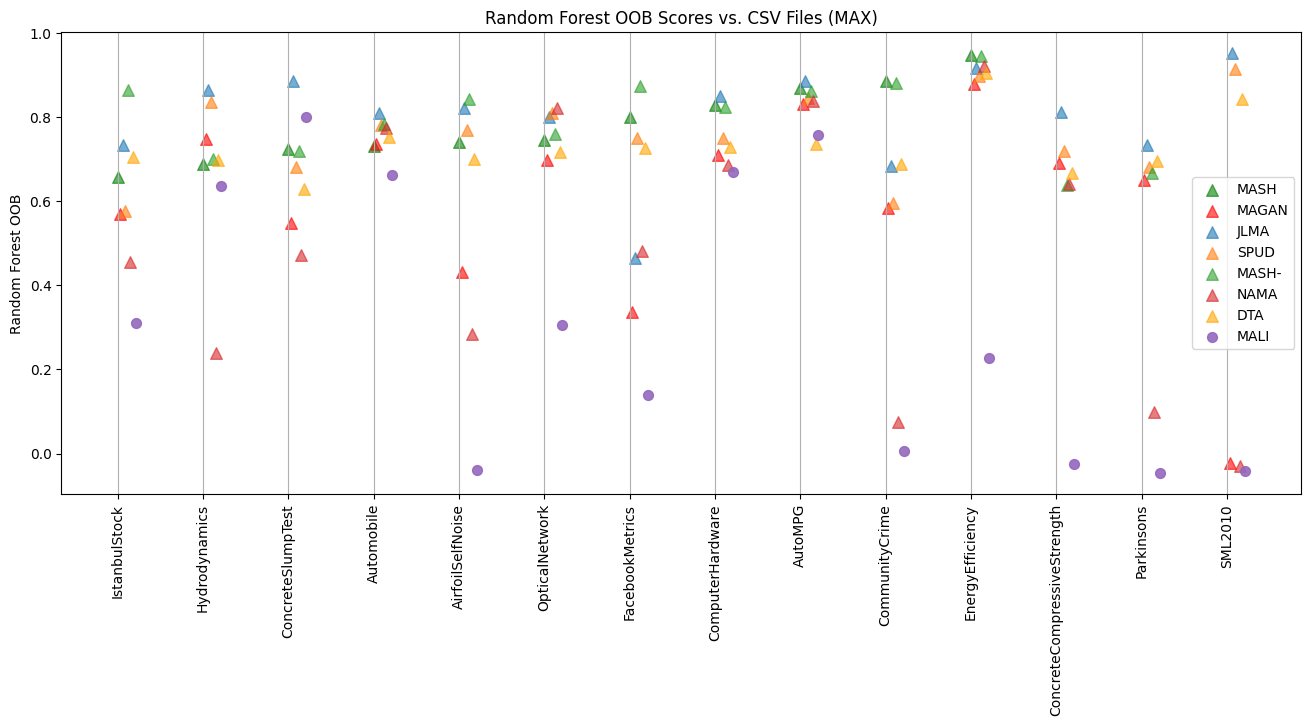

In [10]:
plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB",
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [11]:
proc_reg_df["method"].nunique()

15

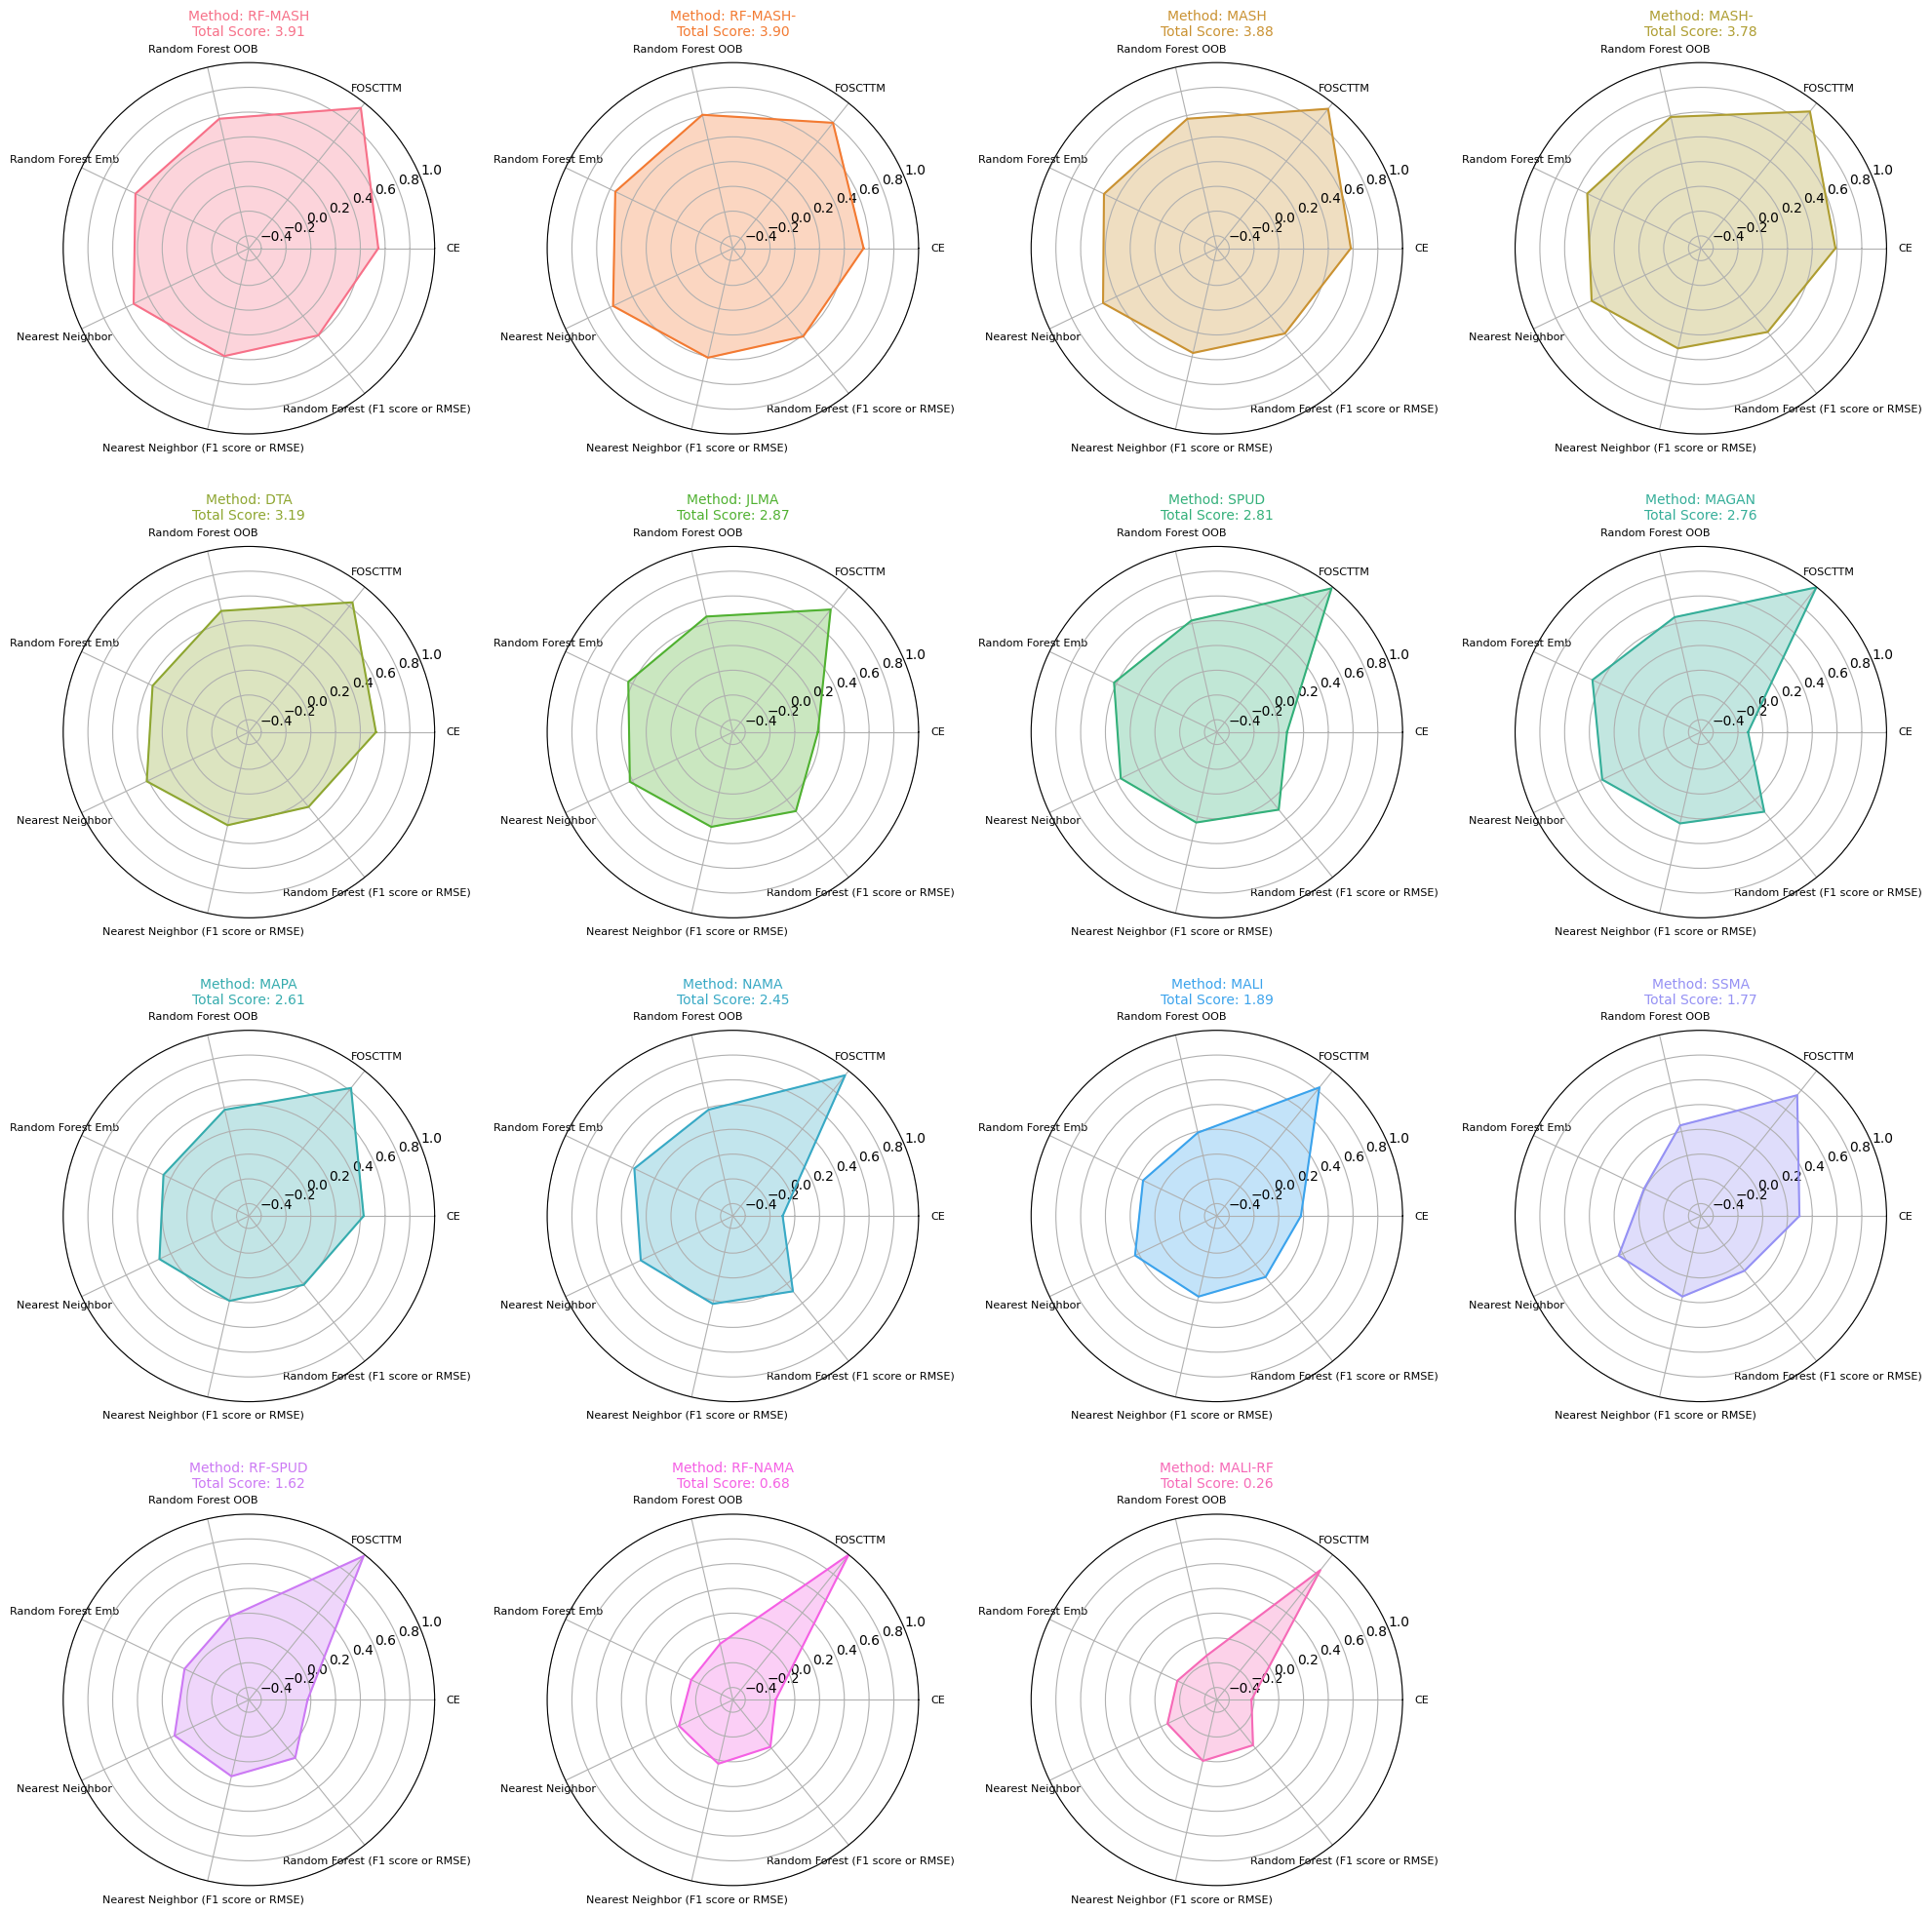

In [12]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [13]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
350,SSMA,CommunityCrime,random,0.3,0.035890,0.349379,-0.108390,-0.082258,0.174983,0.897342,1.029003,"{'42': {'RF-OOB': 0.06047026487023621, 'KNN': ...",-0.313489,0.835857,0.818301
831,SPUD,IstanbulStock,skewed,0.3,0.373705,0.000003,0.391049,0.502999,0.504727,0.787288,0.788660,"{'42': {'RF-OOB': 0.3680762322786788, 'KNN': 0...",0.373701,0.700491,0.936911


In [14]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
219,0.485571,0.725722,0.541656,0.592339,0.685008
465,0.541261,0.684118,0.531233,0.740664,0.691555


In [15]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
468,NAMA,OpticalNetwork,skewed,0.3,-0.926435,0.0,0.501776,0.461524,0.356429,0.810301,0.741193,-0.926435,0.862770,0.936868,0.368628,0.802585,0.471149,0.465173,0.734539
630,MAGAN,AutoMPG,distort,0.3,-0.004559,0.0,0.831094,0.828334,0.764873,0.470743,0.401728,-0.004559,0.956483,0.950881,0.756196,0.451917,0.802660,0.821443,0.406374


In [16]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

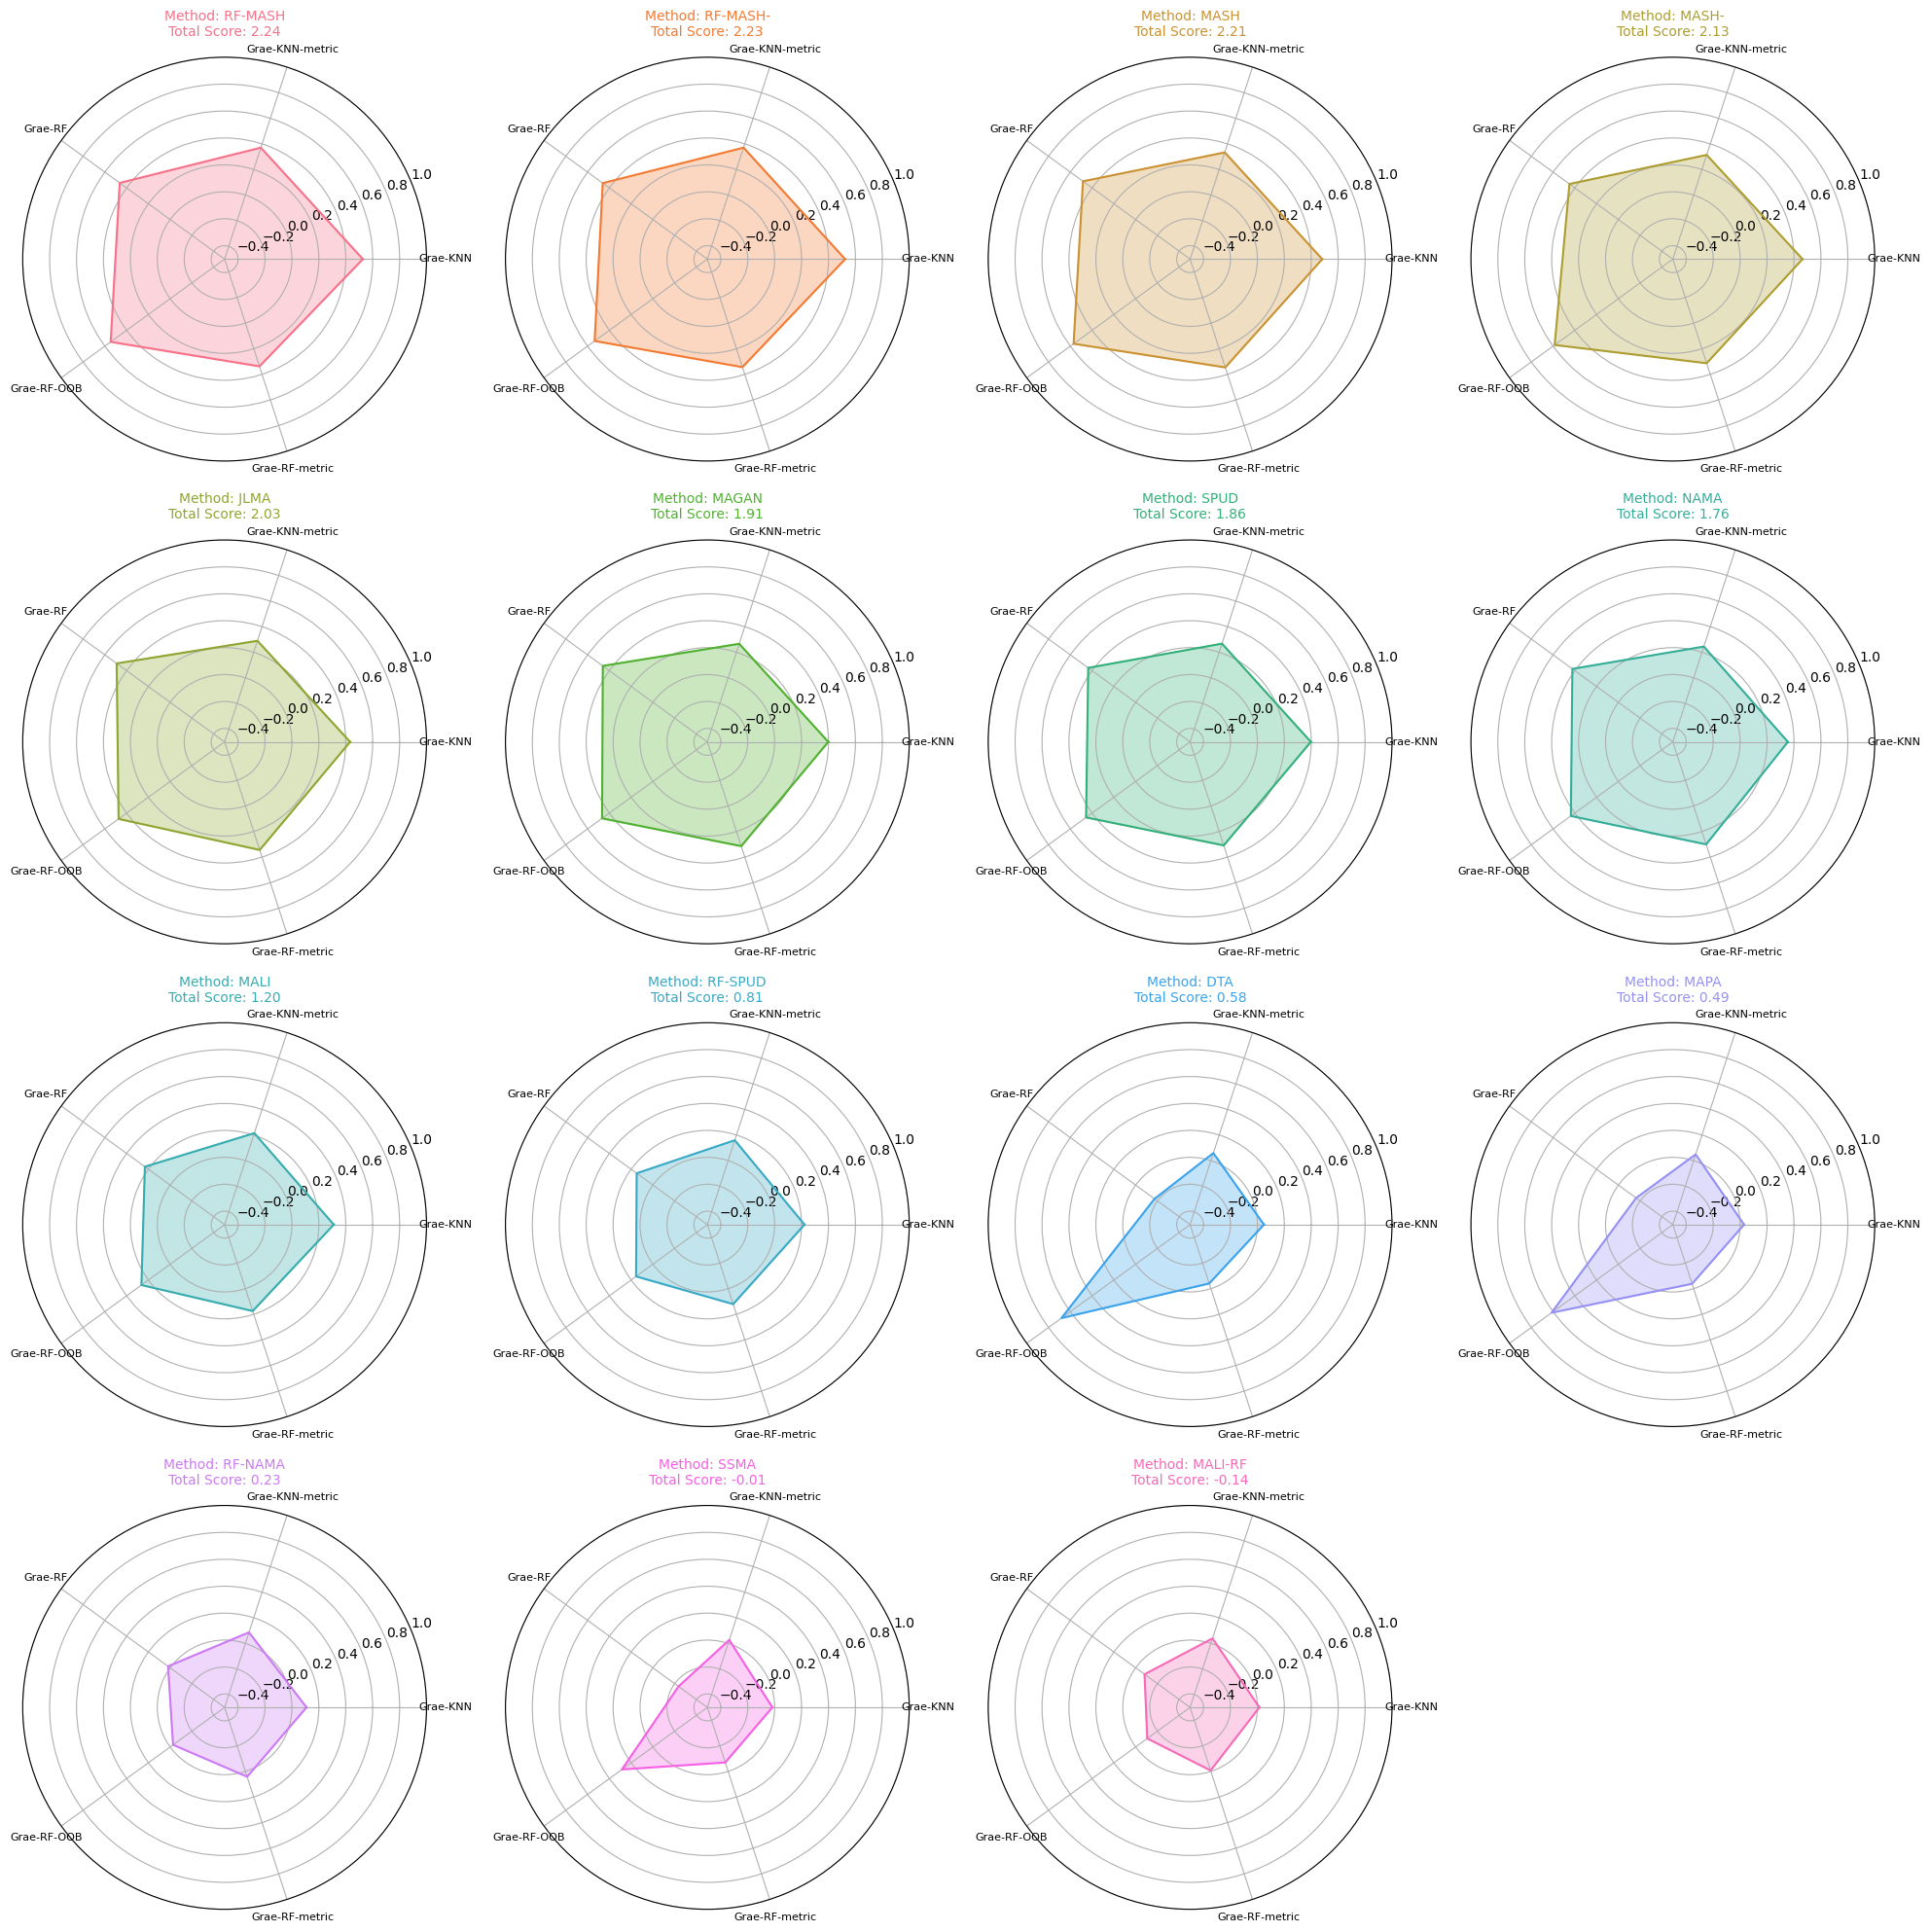

In [17]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

# Compare Grae to RF Extend

In [18]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
572,RF-NAMA,AutoMPG,even,0.3,-0.061408,0.000020,-0.111356,-0.113517,0.083001,0.876534,0.965901,-0.061428,0.945549,0.895393,0.043665,0.895137,-0.092996,-0.139590,0.956960
770,RF-NAMA,Automobile,distort,0.3,0.098525,0.000285,0.299653,0.200970,0.247034,0.790419,0.820849,0.098240,0.923769,0.912711,0.558326,0.475010,0.522411,0.381302,0.493198


In [19]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.526154,0.158615,0.504363,0.363444,0.415754,0.728815,0.727622,0.367539,0.048444,0.941068,-0.173486,0.681460,1.040180
JLMA,0.186421,0.233162,0.457888,0.437567,0.423654,0.715125,0.683981,-0.046741,0.432510,0.710533,0.491310,0.473705,0.655668
MAGAN,-0.118300,0.003965,0.452572,0.471638,0.383893,0.743620,0.677896,-0.122265,0.398445,0.733898,0.460010,0.466873,0.685366
MALI,0.178812,0.170847,0.190649,0.161692,0.233467,0.832154,0.869305,0.007964,0.310919,0.785421,0.232252,0.263916,0.824874
MALI-RF,-0.220123,0.158884,-0.132888,-0.145124,-0.057266,0.994242,1.031648,-0.379007,0.014820,0.961203,-0.081615,-0.106606,1.007045
MAPA,0.426809,0.177010,0.380295,0.265833,0.301906,0.796659,0.789241,0.249799,0.029179,0.951236,-0.162821,0.614079,1.037673
MASH,0.581922,0.058989,0.573247,0.512018,0.520125,0.632516,0.619147,0.522933,0.481768,0.666509,0.483647,0.569766,0.654049
MASH-,0.587125,0.086638,0.588372,0.518150,0.479061,0.670334,0.634792,0.500488,0.463203,0.686039,0.449453,0.585361,0.686679
NAMA,-0.098088,0.045877,0.380997,0.383521,0.325752,0.771800,0.721855,-0.143965,0.354679,0.755690,0.422478,0.436465,0.699235


In [20]:
group_df.columns, group_df.index

(Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
        'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
        'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
        'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
       dtype='object'),
 Index(['DTA', 'JLMA', 'MAGAN', 'MALI', 'MALI-RF', 'MAPA', 'MASH', 'MASH-',
        'NAMA', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'SPUD', 'SSMA'],
       dtype='object', name='method'))

In [21]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [22]:
dif_values = rf_extend.values - grae.values

diff_df = pd.DataFrame(dif_values, index = group_df.index, columns = rf_extend.columns)
diff_df["Nearest Neighbor (F1 score or RMSE)"] = diff_df["Nearest Neighbor (F1 score or RMSE)"] * -1
diff_df["Random Forest (F1 score or RMSE)"] = diff_df["Random Forest (F1 score or RMSE)"] * -1 #To ensure that they are consistent on same side.

diff_df

,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
method,,,,,
DTA,0.455920,-0.577624,0.589240,-0.047354,0.312557
JLMA,0.025378,-0.272966,-0.067656,-0.241420,-0.028313
MAGAN,0.054127,-0.262260,-0.076117,-0.276747,0.007470
MALI,-0.120270,-0.623730,0.001216,-0.568238,-0.044431
MALI-RF,-0.147707,-1.106327,0.024349,-1.100848,-0.024603
MAPA,0.351116,-0.685403,0.464726,-0.182580,0.248432
MASH,0.091479,-0.154491,0.036478,-0.062751,0.034902
MASH-,0.125168,-0.167889,0.029608,-0.084973,0.051887
NAMA,0.026318,-0.372168,-0.096726,-0.335334,-0.022620


<Axes: xlabel='method'>

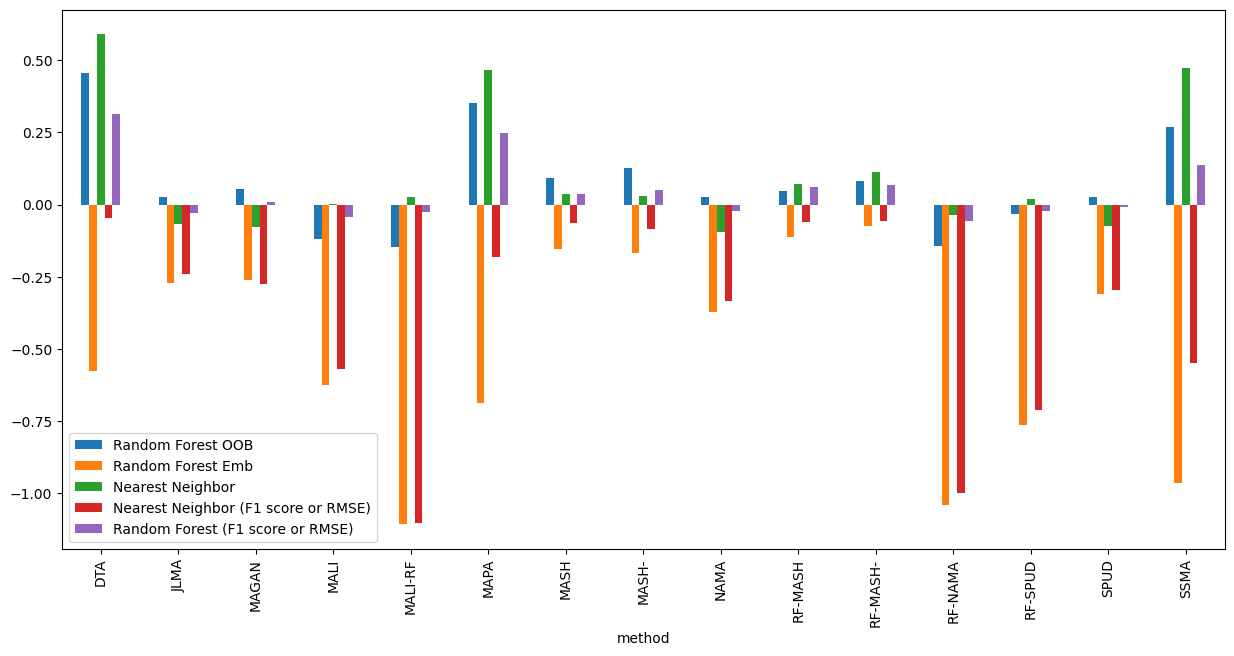

In [23]:
"""
Note that this below isn't really an assesment of how well each method did, but how different Grae is from the non-Grae
Also note that the RMSE is multiplied by -1 so that the bar is on the side where the method is more favorable for it
"""
diff_df.plot(kind = "bar", figsize=(15,7)) # Calculated Non-Grae verisons - Grae_versions

# Veiw Feature variance

In [24]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
137,RF-MASH-,Hydrodynamics,random,0.3,"{'knn': 2, 'page_rank': 'off-diagonal', 'DTM':...",-0.164226,0.413999,"{'42': -0.01867194860721355, '1738': -0.062392...","{'42': -0.2320651045172073, '1738': 0.13846330...","{'42': -0.24781261662145382, '1738': 0.0828834...","{'42': 0.8981562070291975, '1738': 1.042888351...","{'42': 0.8924708047670413, '1738': 1.010793516...","{'42': {'RF-OOB': -0.09371911578497438, 'KNN':...","{'knn': 0.4313503131216606, 'page_rank': 0.038...",-0.578225
232,JLMA,EnergyEfficiency,skewed,0.3,"{'knn': 2, 'normalized_laplacian': False, 'd':...",0.015853,0.451965,{'42': 0.6313896542698982},{'42': 0.6669641389397075},{'42': 0.469297050330873},{'42': 0.7371128408995008},{'42': 0.5839205052774892},"{'42': {'RF-OOB': 0.6989762665271482, 'KNN': 0...",{},-0.436112


### Spud Parameters on STD

In [25]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.293544,0.106728,0.328006
1,0.315521,0.136929,0.113630
2,0.299420,0.038904,0.179496
3,0.257186,0.017215,0.020762
4,0.251965,0.055214,0.303049
...,...,...,...
205,0.303843,0.137920,0.086527
206,0.245030,0.052678,0.133933
207,0.589315,0.178530,0.034385
208,0.222530,0.223938,0.006242


<Axes: >

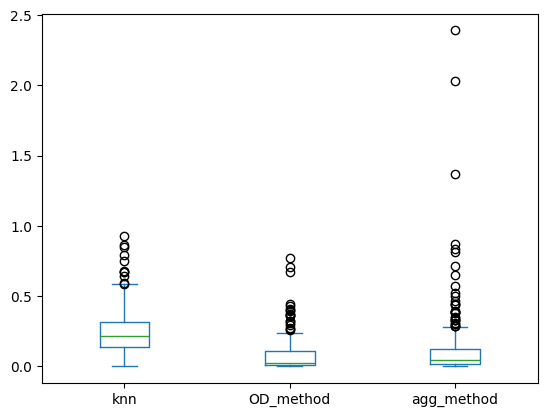

In [26]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [27]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.091198,0.001743,0.056412,0.0
1,0.047943,0.000929,0.017838,0.0
2,0.069734,0.016474,0.033729,0.0
3,0.092486,0.003621,0.056183,0.0
4,0.051415,0.001235,0.009693,0.0
5,0.141639,0.008092,0.227741,0.0
6,0.191730,0.005466,0.008328,0.0
7,0.095779,0.125204,0.023997,0.0
8,0.165841,0.004503,0.056278,0.0
9,0.238521,0.004086,0.119055,0.0


<Axes: >

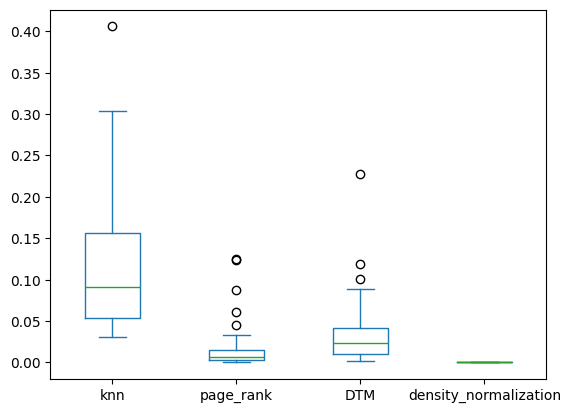

In [28]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [29]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000e+00
2,0.000000,0.000000,0.000000e+00
3,0.000000,0.000000,0.000000e+00
4,0.034208,0.022954,1.110223e-16
5,0.000000,0.000000,0.000000e+00
6,0.006181,0.032061,0.000000e+00
7,0.000000,0.000000,1.387779e-17
8,0.000000,0.000000,0.000000e+00
9,0.000000,0.000000,1.110223e-16


<Axes: >

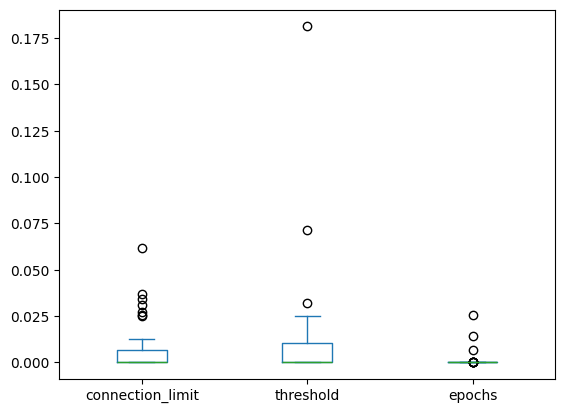

In [30]:
mash_param_df.plot(kind = "box") 